# Fish Dataset Classification with ResNet50

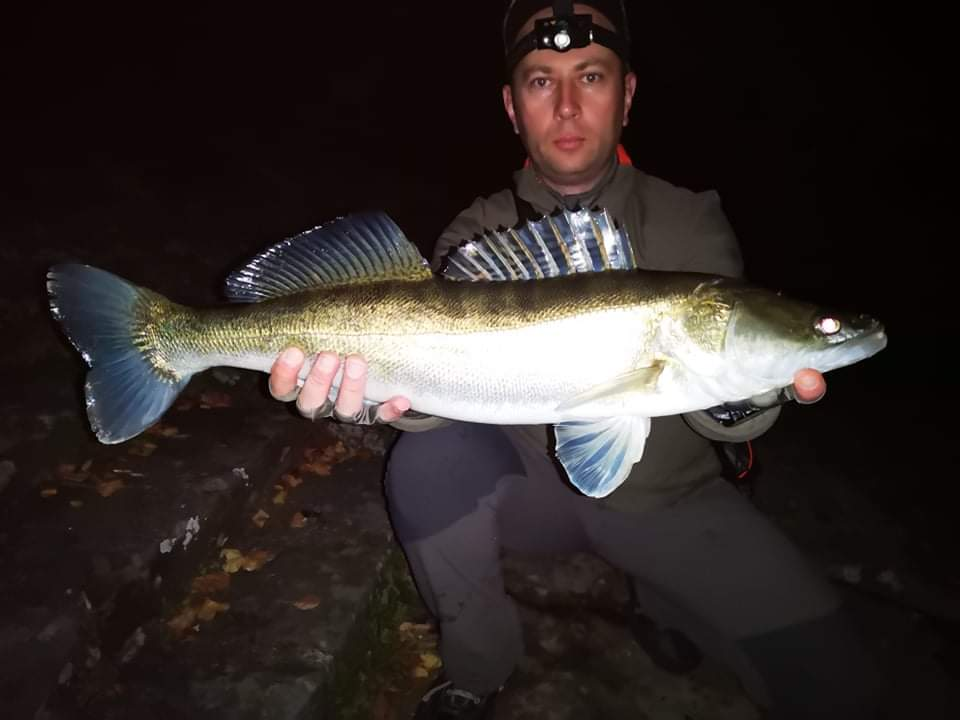

In [2]:
from IPython.display import Image, display, HTML
display(Image(filename='sudak.jpg', width=300*300))

In [3]:
import cv2
import pandas as pd
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from IPython.display import Image

In [4]:
labels=['Sea Bass','Shrimp','Striped Red Mullet','Trout']
img_path='Fish_Data/Fish_Dataset/'

In [5]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+"/"+img_file)
        label_list.append(label)

In [6]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [7]:
df.head(20)

,img,label
0,Fish_Data/Fish_Dataset/Sea Bass/00001.png,Sea Bass
1,Fish_Data/Fish_Dataset/Sea Bass/00002.png,Sea Bass
2,Fish_Data/Fish_Dataset/Sea Bass/00003.png,Sea Bass
3,Fish_Data/Fish_Dataset/Sea Bass/00004.png,Sea Bass
4,Fish_Data/Fish_Dataset/Sea Bass/00005.png,Sea Bass
5,Fish_Data/Fish_Dataset/Sea Bass/00006.png,Sea Bass
6,Fish_Data/Fish_Dataset/Sea Bass/00007.png,Sea Bass
7,Fish_Data/Fish_Dataset/Sea Bass/00008.png,Sea Bass
8,Fish_Data/Fish_Dataset/Sea Bass/00009.png,Sea Bass
9,Fish_Data/Fish_Dataset/Sea Bass/00010.png,Sea Bass


In [8]:
df.tail(20)

,img,label
3980,Fish_Data/Fish_Dataset/Trout/00981.png,Trout
3981,Fish_Data/Fish_Dataset/Trout/00982.png,Trout
3982,Fish_Data/Fish_Dataset/Trout/00983.png,Trout
3983,Fish_Data/Fish_Dataset/Trout/00984.png,Trout
3984,Fish_Data/Fish_Dataset/Trout/00985.png,Trout
3985,Fish_Data/Fish_Dataset/Trout/00986.png,Trout
3986,Fish_Data/Fish_Dataset/Trout/00987.png,Trout
3987,Fish_Data/Fish_Dataset/Trout/00988.png,Trout
3988,Fish_Data/Fish_Dataset/Trout/00989.png,Trout
3989,Fish_Data/Fish_Dataset/Trout/00990.png,Trout


In [9]:
# Fish olanlari 1 e, Fish olmayanlari (NA_Fish) 0 a esitliyoruz.

In [10]:
labels = ['Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
d = {label: idx for idx, label in enumerate(labels)}
df['encode_label'] = df['label'].map(d)

In [11]:
df.head()

,img,label,encode_label
0,Fish_Data/Fish_Dataset/Sea Bass/00001.png,Sea Bass,0
1,Fish_Data/Fish_Dataset/Sea Bass/00002.png,Sea Bass,0
2,Fish_Data/Fish_Dataset/Sea Bass/00003.png,Sea Bass,0
3,Fish_Data/Fish_Dataset/Sea Bass/00004.png,Sea Bass,0
4,Fish_Data/Fish_Dataset/Sea Bass/00005.png,Sea Bass,0


In [12]:
df.tail()

,img,label,encode_label
3995,Fish_Data/Fish_Dataset/Trout/00996.png,Trout,3
3996,Fish_Data/Fish_Dataset/Trout/00997.png,Trout,3
3997,Fish_Data/Fish_Dataset/Trout/00998.png,Trout,3
3998,Fish_Data/Fish_Dataset/Trout/00999.png,Trout,3
3999,Fish_Data/Fish_Dataset/Trout/01000.png,Trout,3


In [13]:
# Resimleri tek tek okuyup sayiya cevirmeliyiz

In [14]:
x=[]  # bos liste olusturuyoruz.
for img in df['img']:    # her bir resmi oku
    img=cv2.imread(str(img))
    img=cv2.resize(img,(170,170)) # resimlerini boyutunu (170,170) ayarladik.
    img=img/255.0 # resimleri 0 ile 255 arasinda sayilar veriyoruz. normalize ediyoruz.
    x.append(img)  # listeye ekle

In [15]:
x=np.array(x)

In [16]:
y=df['encode_label']

In [17]:
x_train,x_test, y_train,y_test=train_test_split(x,y,random_state=42, test_size=0.20)

In [18]:
y_train=np.array(y_train,dtype=np.int32)
y_test=np.array(y_test ,dtype=np.int32)

In [19]:
model = Sequential()
model.add(Input(shape=(170, 170, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  
model.add(Dense(4, activation='softmax'))  # 4 sınıf için softmax

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=20,verbose=1)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 327ms/step - accuracy: 0.7563 - loss: 0.8486 - val_accuracy: 0.9538 - val_loss: 0.1484
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 323ms/step - accuracy: 0.9741 - loss: 0.0814 - val_accuracy: 0.9750 - val_loss: 0.0680
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 340ms/step - accuracy: 0.9941 - loss: 0.0200 - val_accuracy: 0.9638 - val_loss: 0.0963
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 326ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.9825 - val_loss: 0.0509
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 313ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9912 - val_loss: 0.0262
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 318ms/step - accuracy: 1.0000 - loss: 3.4598e-04 - val_accuracy: 0.9887 - val_loss: 0.0273
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 333ms/step - accuracy: 1.0000 - loss: 2.0410e-04 - val_accuracy: 0.9887 - val_loss: 0.0258
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 333ms/step - accuracy: 1.0000 -

In [55]:
model.save('Fish_Data_V3.h5')

## Transferlearning with ResNet50

In [67]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [69]:
data_dir='Fish_Data'
img_width,img_heigth=224,224

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='binary', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='binary', subset='validation')

base_model=ResNet50(weights='imagenet', input_shape=(img_width,img_heigth,3),include_top=False)

model=Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False
    
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Found 3544 images belonging to 2 classes.
Found 886 images belonging to 2 classes.


In [70]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,350,209 (481.99 MB)

 Trainable params: 102,762,497 (392.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [73]:
model.save('Fish_Data_TLv3.h5')